# Wild Blueberry Pollination Simulation

The dataset used for this predictive modelling was generated by the Wild Blueberry Pollination Simulation Model, which is an open-source, spatially-explicit computer simulation program, that enables exploration of how various factors, including plant spatial arrangement, outcrossing and self-pollination, bee species compositions and weather conditions, in isolation and combination, affect pollination efficiency and yield of the wild blueberry agro-ecosystem. The simulation model has been validated by the field observation and experimental data collected in Maine USA and Canadian Maritimes during the last 30 years and now is a useful tool for hypothesis testing and theory development for wild blueberry pollination researches. This simulated data provides researchers who have actual data collected from field observation and those who wants to experiment the potential of machine learning algorithms response to real data and computer simulation modelling generated data as input for crop yield prediction models.

The target feature is **yield** which is a continuous variable. The task is to classify this variable based on the other 17 features step-by-step by going through each day's task. The evaluation metrics will be **RMSE score**.



### Import the libraries

In [154]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('ggplot')
sns.set_palette('Set2')

In [155]:
import joblib
%matplotlib inline

### Read the input dataset

In [156]:
df = pd.read_csv('WildBlueberryPollinationSimulationData .csv')
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [157]:
#Removing the row number
df.drop(columns = 'Row#',inplace = True)

### Exploratory Data Analysis

In [158]:
df.shape

(777, 17)

**The dataset has 777 rows and 17 columns.**

In [159]:
df.duplicated().sum()

0

**No duplicates in the dataset.**

In [160]:
df.isnull().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

**The dataset has no nulls.**

In [161]:
df.nunique()

clonesize                 6
honeybee                  7
bumbles                  10
andrena                  12
osmia                    12
MaxOfUpperTRange          5
MinOfUpperTRange          5
AverageOfUpperTRange      5
MaxOfLowerTRange          5
MinOfLowerTRange          5
AverageOfLowerTRange      5
RainingDays               5
AverageRainingDays        5
fruitset                777
fruitmass               777
seeds                   777
yield                   777
dtype: int64

The temperature columns have only 5 unique values. This maybe because a range of values was selected during the experiment.

In [162]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clonesize,777.0,18.767696,6.999063,10.000000,12.500000,12.500000,25.000000,40.000000
honeybee,777.0,0.417133,0.978904,0.000000,0.250000,0.250000,0.500000,18.430000
bumbles,777.0,0.282389,0.066343,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,777.0,0.468817,0.161052,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,777.0,0.562062,0.169119,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,777.0,82.277091,9.193745,69.700000,77.400000,86.000000,89.000000,94.600000
MinOfUpperTRange,777.0,49.700515,5.595769,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,777.0,68.723037,7.676984,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,777.0,59.309395,6.647760,50.200000,55.800000,62.000000,66.000000,68.200000
MinOfLowerTRange,777.0,28.690219,3.209547,24.300000,27.000000,30.000000,30.000000,33.000000


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 7

**Inference:**

1. The data has 777 rows and 17 columns.
2. No duplicates.
3. No nulls in dataset.
4. All columns except fruitmass, fruitset, seeds have unique values.


### Data Visualization

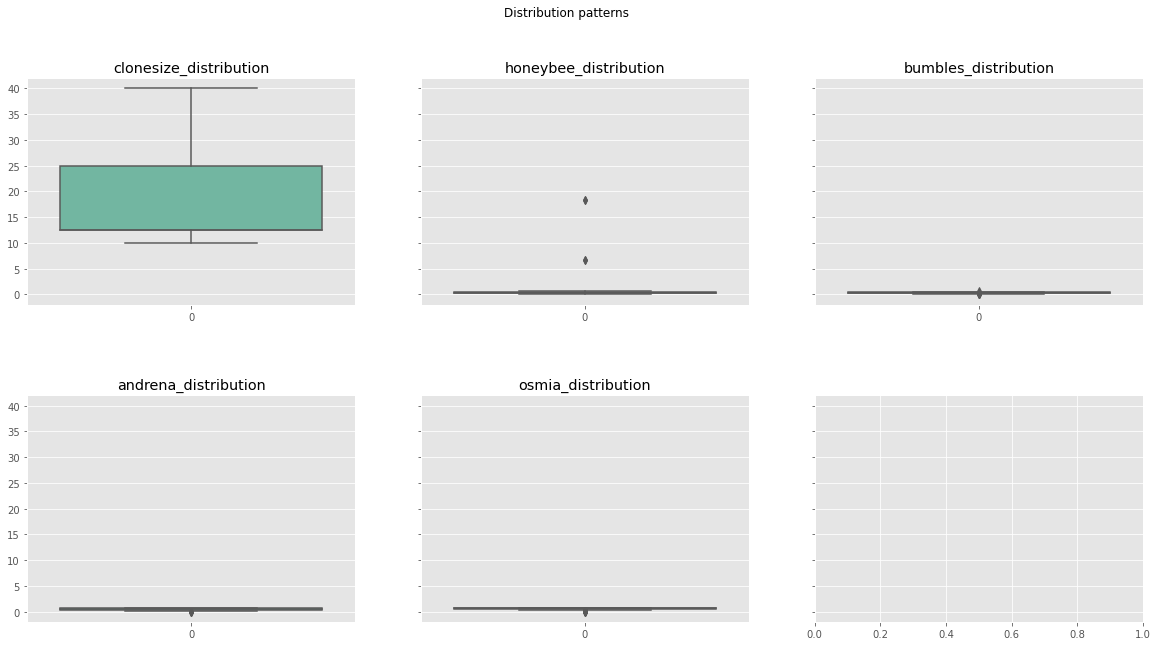

In [164]:
# Visualizing the distribution of clonesize, honeybee, bumbles, andrena, osmia

cols = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia']

fig,ax = plt.subplots(2,3, figsize=(20,10),sharey = True)
fig.suptitle("Distribution patterns")
for e,s in enumerate(cols):
    if e<3:
        sns.boxplot(data=df[s],ax=ax[0,e])\
        .set(title=s+'_distribution')
    else:
        sns.boxplot(data=df[s],ax=ax[1,e-3])\
        .set(title=s+'_distribution')
#plt.show()

plt.subplots_adjust(hspace=0.4)




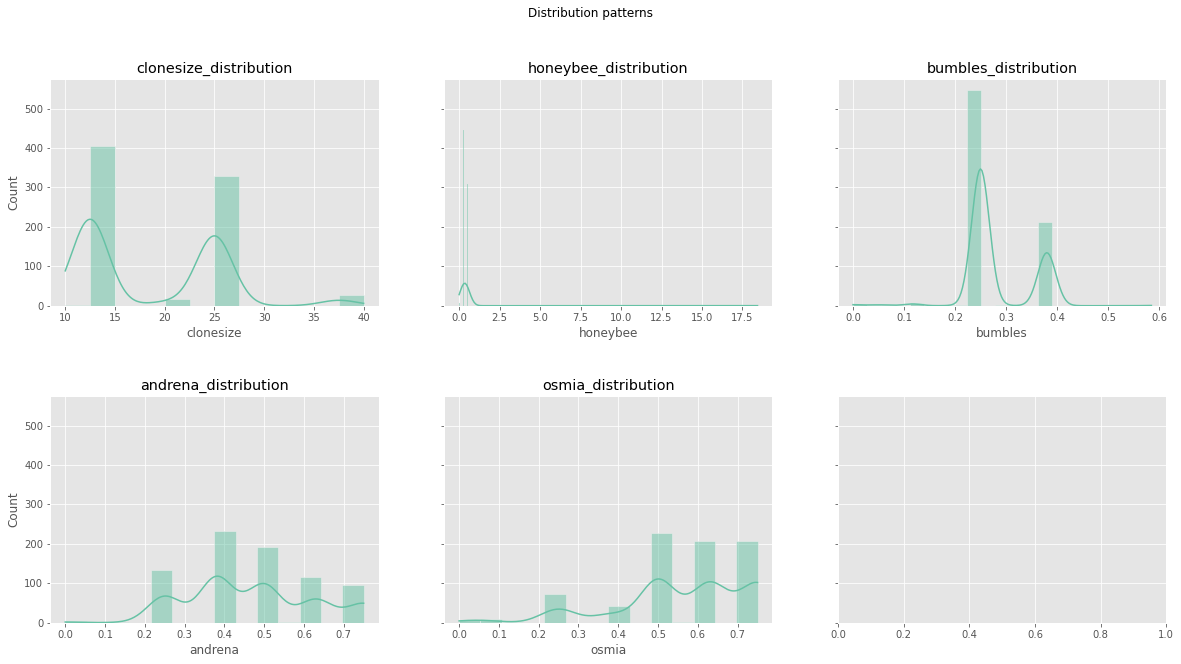

In [165]:
# Visualizing the distribution of clonesize, honeybee, bumbles, andrena, osmia

cols = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia']

fig,ax = plt.subplots(2,3, figsize=(20,10),sharey = True)
fig.suptitle("Distribution patterns")
for e,s in enumerate(cols):
    if e<3:
        sns.histplot(data=df[s],ax=ax[0,e],kde=True)\
        .set(title=s+'_distribution')
    else:
        sns.histplot(data=df[s],ax=ax[1,e-3],kde=True)\
        .set(title=s+'_distribution')
#plt.show()

plt.subplots_adjust(hspace=0.4)



Inference:
1. Honey bee distribution is highly uneven. Max being concentrated between 0 and 1.
2. Bumbles distribution is maximum at 0.25

In [166]:
# cols=[['MaxOfUpperTRange','AverageOfUpperTRange','MinOfUpperTRange'],
#       ['MaxOfLowerTRange','AverageOfUpperTRange','MinOfUpperTRange']]
# fig,ax = plt.subplots(1,2,figsize=(10,15),sharey=True)
# fig.suptitle('Temperature_distribution')

# for e,s in enumerate(cols):
#     sns.histplot(data=df[s],ax=ax[e])\
#     .set(title=s[0][5:10]+'_temperature_ditrb')
# # ax.set_xticklabels(rotation=90)
    
    

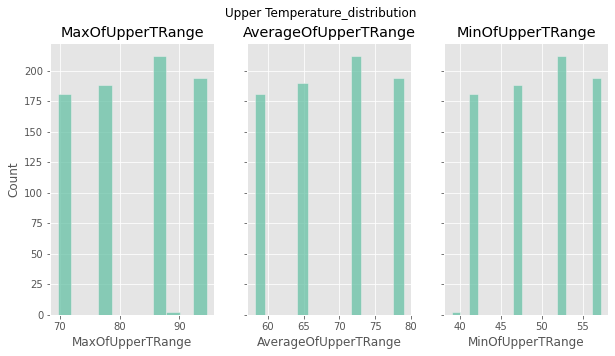

In [167]:
cols = ['MaxOfUpperTRange','AverageOfUpperTRange','MinOfUpperTRange']

fig,ax = plt.subplots(1,3,figsize=(10,5),sharey=True)
fig.suptitle('Upper Temperature_distribution')

for e,s in enumerate(cols):
    sns.histplot(data=df[s],ax=ax[e])\
    .set(title=s)
# ax.set_xticklabels(rotation=90)
    
    

Inference:
    
1. The max of upper temperature ranges between 70 to 95, minimum of upper temperature ranges between 40 to 57 and avaerage of upper temperature between 55 and 80.


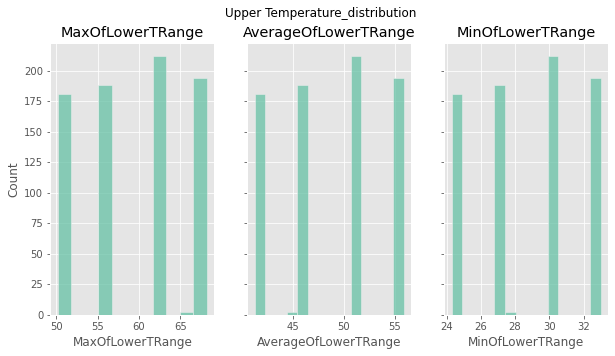

In [168]:
cols = ['MaxOfLowerTRange','AverageOfLowerTRange','MinOfLowerTRange']

fig,ax = plt.subplots(1,3,figsize=(10,5),sharey=True)
fig.suptitle('Upper Temperature_distribution')

for e,s in enumerate(cols):
    sns.histplot(data=df[s],ax=ax[e])\
    .set(title=s)

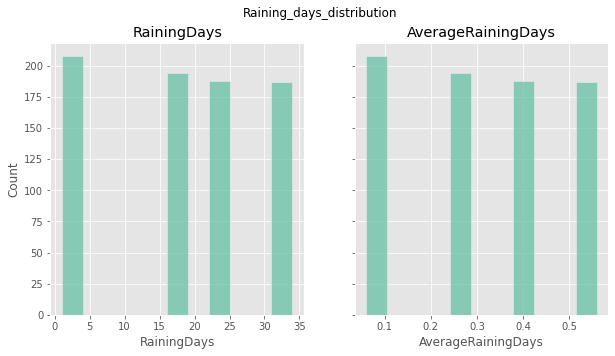

In [169]:
cols =['RainingDays','AverageRainingDays']

fig,ax = plt.subplots(1,2,figsize=(10,5),sharey=True)
fig.suptitle('Raining_days_distribution')

for e,s in enumerate(cols):
    sns.histplot(data=df[s],ax=ax[e])\
    .set(title=s)

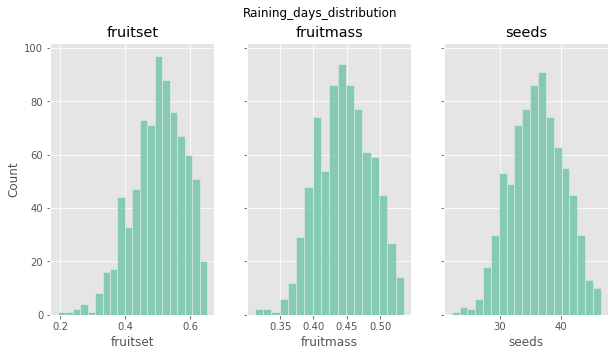

In [170]:
cols =['fruitset','fruitmass','seeds']
fig,ax = plt.subplots(1,3,figsize=(10,5),sharey=True)
fig.suptitle('Raining_days_distribution')

for e,s in enumerate(cols):
    sns.histplot(data=df[s],ax=ax[e])\
    .set(title=s)

Inference:
    
The fruitset, fruitmass, seeds have almost uniform distribution

<Figure size 1440x2160 with 0 Axes>

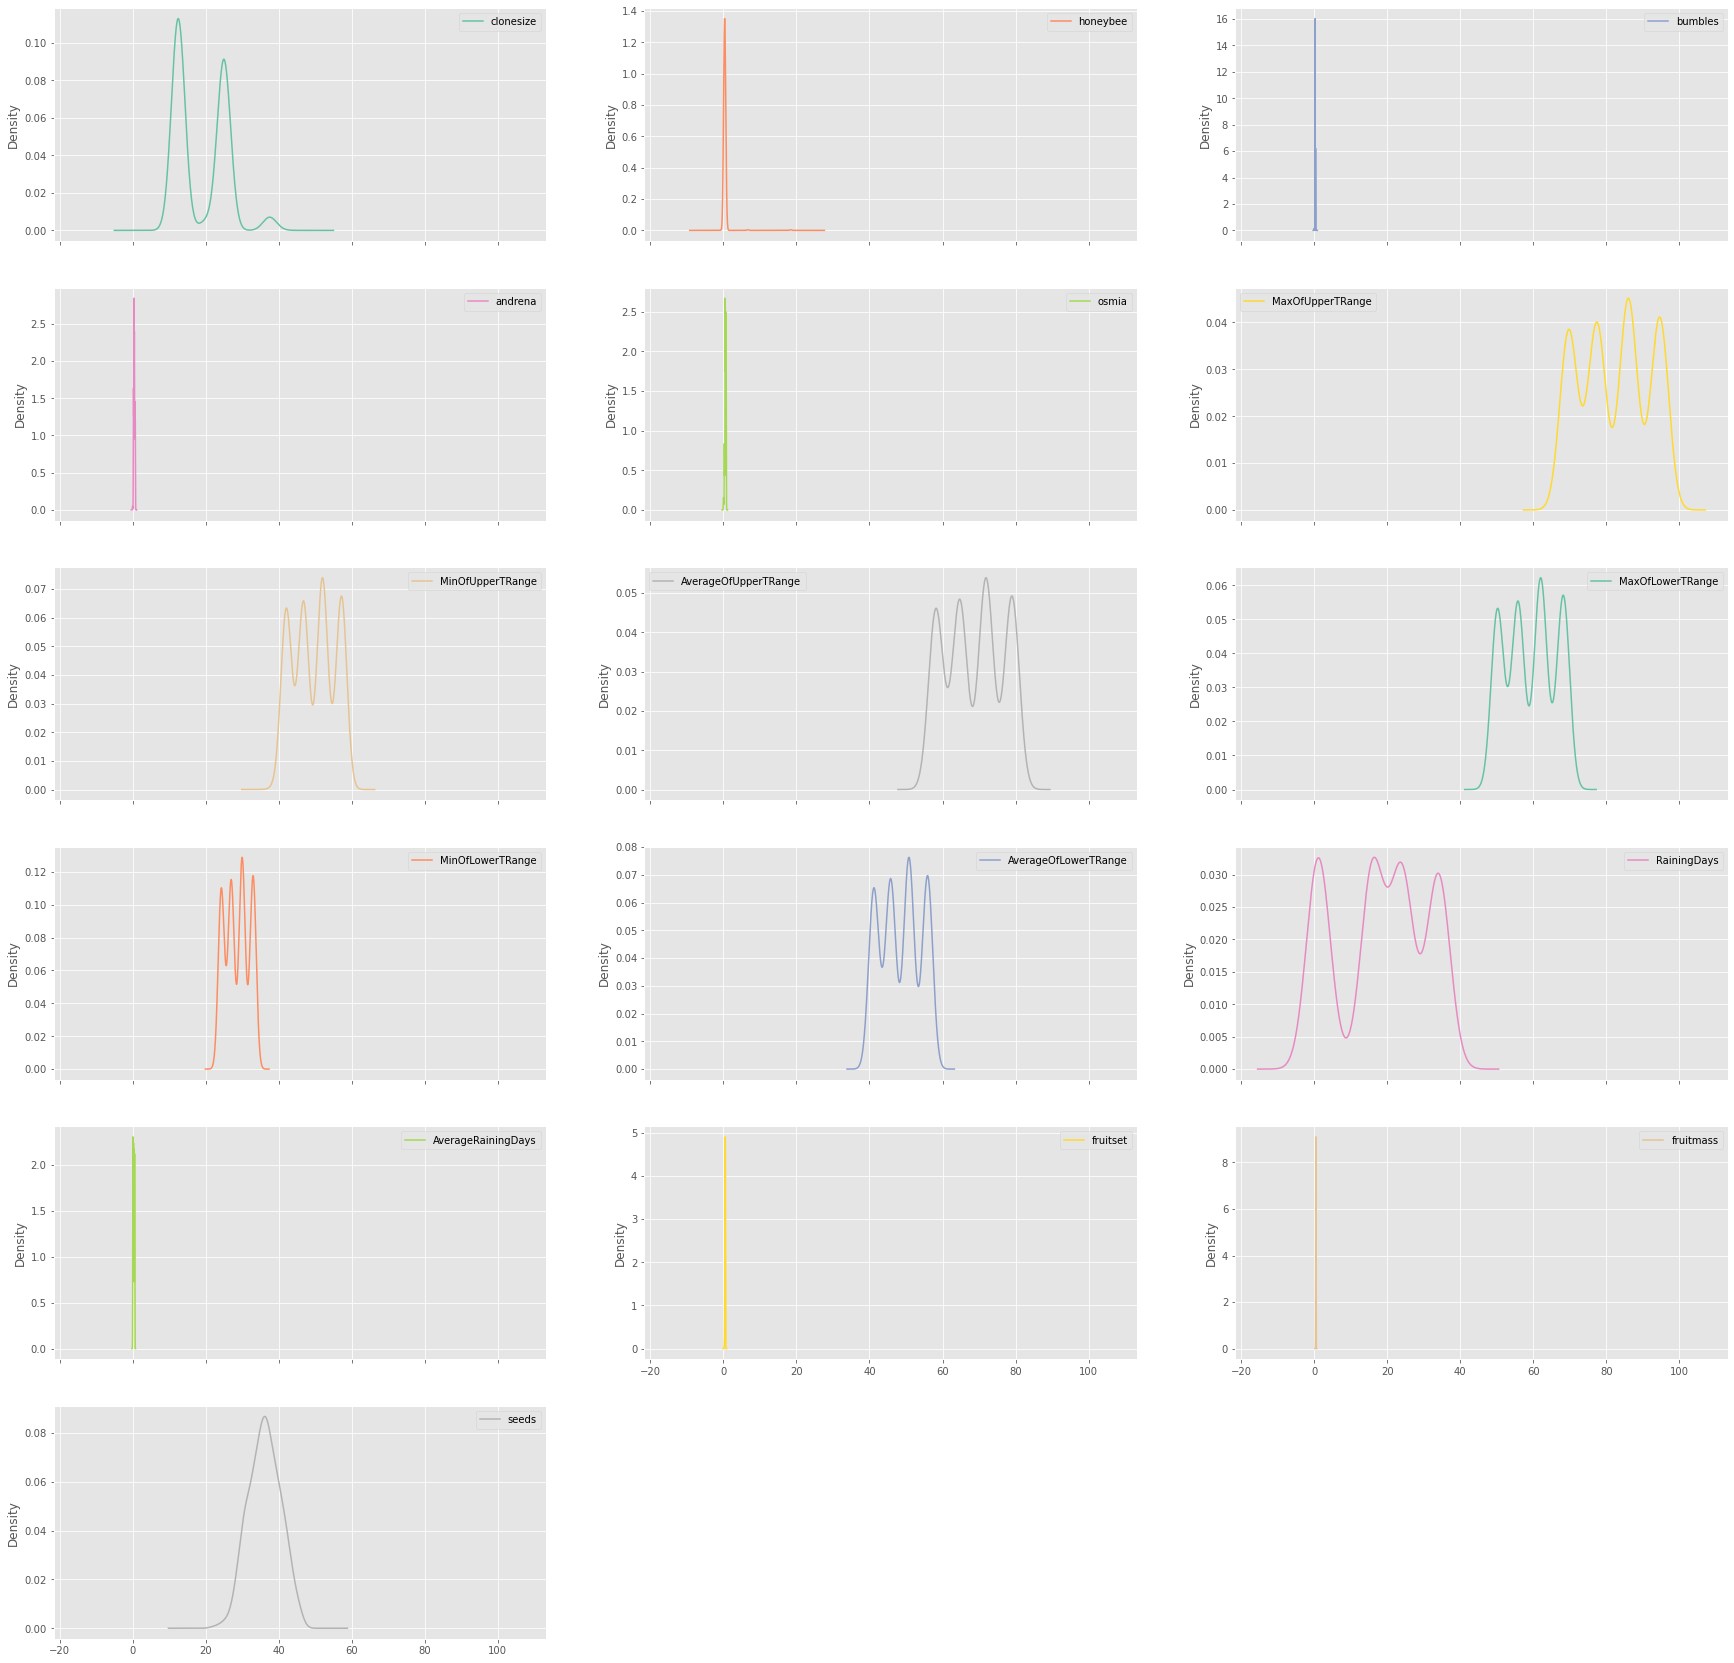

In [171]:
#Using the df.plot function
fig=plt.figure(figsize=(20,30))

# df['clonesize','honeybee','bumbles','adrena','osmia'].plot(kind='density',subplots = True,layout=(3,2))
# !pip3 install --upgrade pandas

# df.plot(kind="density", subplots=True, layout = (6,3))
# df.plot()#kind='density')#,subplots = True,layout=(6,3))
df.drop('yield',axis=1).plot(kind="density", subplots=True, layout = (6,3),figsize=(30,30))


plt.show()






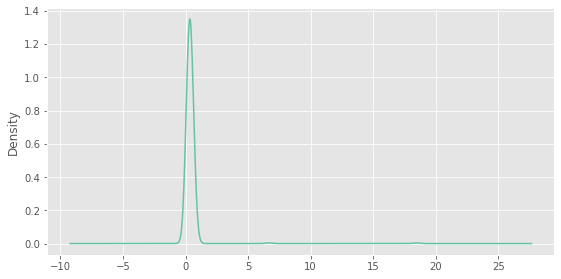

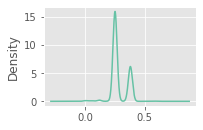

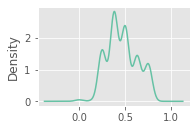

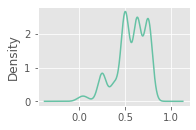

<Figure size 432x288 with 0 Axes>

In [172]:
plt.figure(figsize=(20,10))
pltnum=1
cols = ['honeybee','bumbles','andrena','osmia']
for col in cols:
    if pltnum<=4:
        plt.subplot(2,2,pltnum)
        ax1=df[col].plot(kind='density',xlabel=col,ylabel='density')
        plt.show()
        pltnum=+1
plt.tight_layout()
   

Inference:
    
The fruitset, fruitmass, seeds have almost uniform distribution

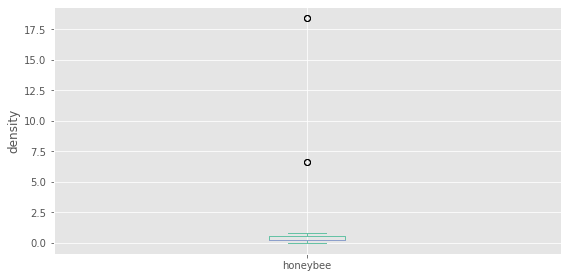

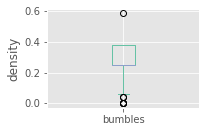

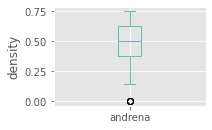

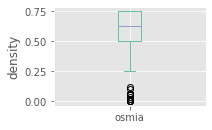

<Figure size 432x288 with 0 Axes>

In [173]:
plt.figure(figsize=(20,10))
pltnum=1
cols = ['honeybee','bumbles','andrena','osmia']
for col in cols:
    if pltnum<=4:
        plt.subplot(2,2,pltnum)
        ax1=df[col].plot(kind='box',xlabel=col,ylabel='density')
        plt.show()
        pltnum=+1
plt.tight_layout()
   

**Question:** Why are the plots not displayed as specified in subplots

<AxesSubplot:xlabel='yield', ylabel='Count'>

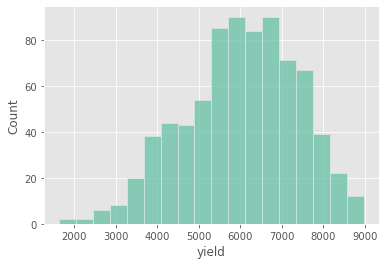

In [174]:
#Target variable distribution

sns.histplot(data=df['yield'])

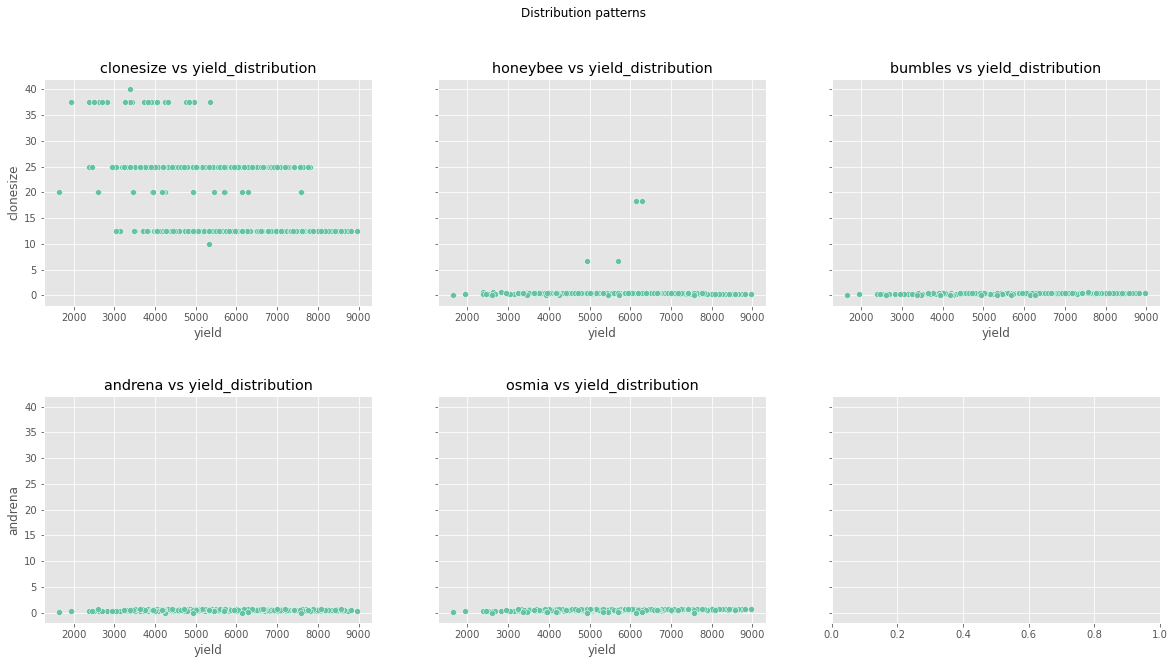

In [175]:
cols = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia']

fig,ax = plt.subplots(2,3, figsize=(20,10),sharey = True)
fig.suptitle("Distribution patterns")
for e,s in enumerate(cols):
    if e<3:
        sns.scatterplot(data=df,y=s,x='yield',ax=ax[0,e])\
        .set(title=s+' vs yield_distribution')
#         .set_xticklabels(rotation=90)
    else:
        sns.scatterplot(data=df,y=s,x='yield',ax=ax[1,e-3])\
        .set(title=s+' vs yield_distribution')
#         ax.set_xticklabels(rotation=90)
    


#plt.show()

plt.subplots_adjust(hspace=0.4)





Inference:
Looks like the clone size has an inverse relation ship with yeild. The yield is higher when clone size was smaller.

<AxesSubplot:xlabel='fruitset', ylabel='fruitmass'>

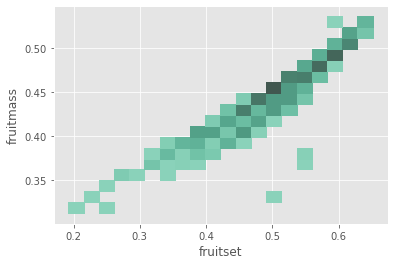

In [176]:
#Relation between fruitset and fruitmass

sns.histplot(data=df,x='fruitset',y='fruitmass')

<AxesSubplot:xlabel='fruitmass', ylabel='seeds'>

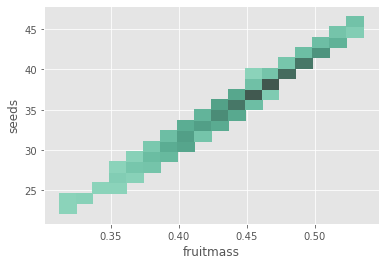

In [177]:
#Relation between seeds and fruitmass
sns.histplot(data=df,x='fruitmass',y='seeds')

<AxesSubplot:xlabel='fruitset', ylabel='seeds'>

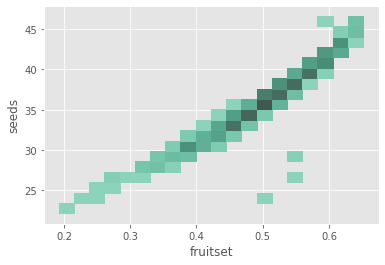

In [178]:
sns.histplot(data=df,x='fruitset',y='seeds')

<AxesSubplot:xlabel='fruitmass', ylabel='yield'>

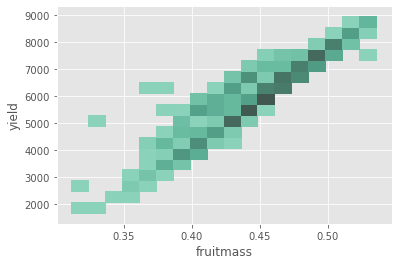

In [179]:
# Relation between fruitset and yield
sns.histplot(data=df,x='fruitmass',y='yield')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:936: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:936: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:936: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


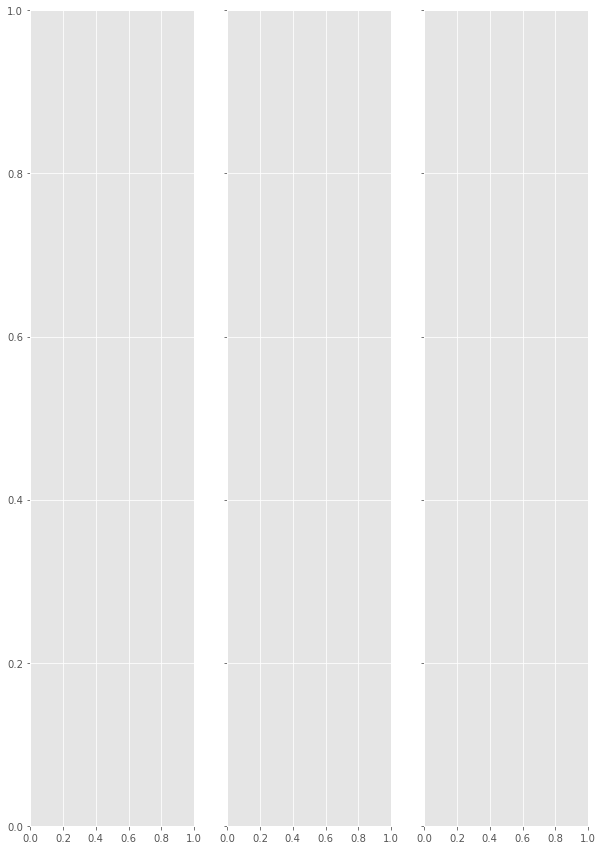

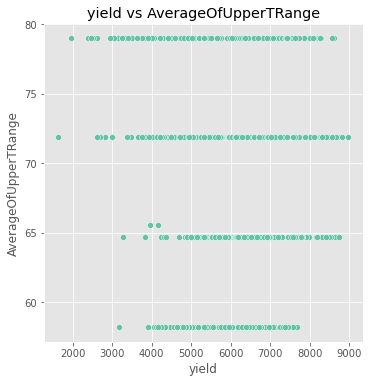

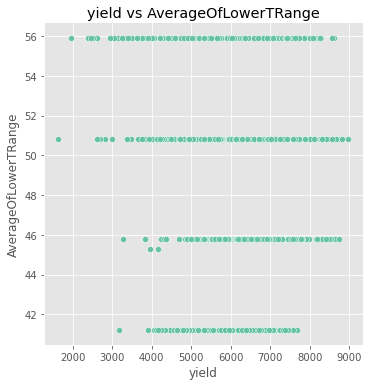

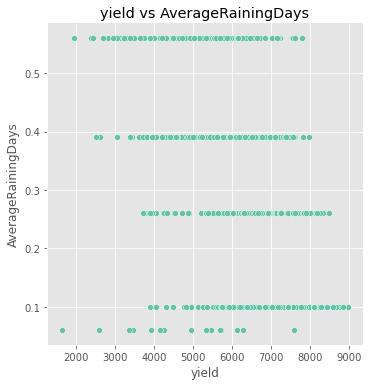

In [180]:
cols = ['AverageOfUpperTRange','AverageOfLowerTRange','AverageRainingDays']

fig,ax = plt.subplots(1,3,figsize=(10,15),sharey = True)

for e,s in enumerate(cols):
    sns.relplot(data=df,x='yield',y=s,ax=ax[e])\
    .set(title='yield vs '+ s)
plt.subplots_adjust(hspace=0.4)



Inference:

Higher temperatures mostly show higher yield.Higher yield was also noticed when average rainfall was low.


In [ ]:
#Pairplot

#fig=plt.figure(figsize=(40,40))
%matplotlib inline
plt.rcParams['figure.figsize']=(40,40)

sns.pairplot(data=df,diag_kind='kde')

In [ ]:
#correlation
corr=df.corr()
print(corr)

In [ ]:
#heatmap
fig=plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)

The heat map shows that the three columns related to temperature are highly correlated to each other. 

Also, the fruitmass, fruitset and seed columns are highly corelated.

Hence, we consider dropping the corelated columns.

## Preprocessing

In [ ]:
# Take a copy of the dataset before applying any processing

df_copy=df.copy()

From the above analysis, we realise that there areno missing values to be handled, no outliers to be considered.
Only processing required will be removing the corelated columns.

In the first approach, considering to keep only average values of higher and lower temperatures and average raining day values.




In [ ]:
#Columns to drop inlude 'MaxOfUpperTRange''MinOfUpperTRange' 'MaxOfLowerTRange''MinOfLowerTRange'and RainingDays

df.drop(columns=['MaxOfUpperTRange','MinOfUpperTRange','MaxOfLowerTRange','MinOfLowerTRange','RainingDays'],inplace=True)
df.head()

In [ ]:
# Updating the outliers using the upper bound and lower bound values.
cols = ['honeybee','bumbles','andrena','osmia']
for col in cols:
    q1 = df[col].quantile(q=0.25)
    q3 = df[col].quantile(q=0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    print(lower_bound,upper_bound)
    df[col] = df[col].apply(lambda x : upper_bound if (x > upper_bound) else x)
    df[col] = df[col].apply(lambda x : lower_bound if (x < lower_bound) else x)

In [ ]:
cols = ['honeybee','bumbles','andrena','osmia']
for col in cols:
    if pltnum<=4:
        plt.subplot(2,2,pltnum)
        ax1=df[col].plot(kind='box',xlabel=col,ylabel='density')
        plt.show()
        pltnum=+1
plt.tight_layout()
   

The above boxplot shows that outliers are removed.

In [ ]:
# Checking the z-score
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

In [ ]:
df_zscore = df[(z>3).all(axis=1)]

In [ ]:
df_zscore

## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

##### Perform the train test split before applyig feature selection

In [ ]:
y = df['yield']

In [ ]:
X = df.drop(['yield'],axis=1)

In [ ]:
# def select_features_corr_based(X_train, y_train, X_test, x="all"):
#     if type(x) == str:
#         fs_corr = SelectKBest(score_func=f_regression, k='all')
#     else:
#         fs_corr = SelectKBest(score_func=f_regression, k = x)
#     fs_corr.fit(X_train, y_train)
#     X_train_fs = fs_corr.transform(X_train)
#     X_test_fs = fs_corr.transform(X_test)
    
#     return X_train_fs, X_test_fs, fs_corr

#

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)



In [ ]:
# Select K Best features with regression correlation - f_regression

def select_features_corr_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_regression, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_regression, k = x)
    fs_corr.fit(X_train, y_train)
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_corr


In [ ]:
# Return the features for correlation regression
X_train_fs_corr, X_test_fs_corr, fs_corr = select_features_corr_based(X_train, y_train, X_test)

In [ ]:
## Select K Best features with mutual info gain for cotiuous target

def select_features_infogain_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_info = SelectKBest(score_func=mutual_info_regression, k='all')
    else:
        fs_info = SelectKBest(score_func=mutual_info_regression, k=x)
    fs_info.fit(X_train, y_train)
    X_train_fs = fs_info.transform(X_train)
    X_test_fs = fs_info.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_info

In [ ]:
# Return the features for mutual info gain
X_train_fs_info, X_test_fs_info, fs_info = select_features_infogain_based(X_train, y_train, X_test)

In [ ]:

def fs_score_plot(fs_func):
    
    for i in range(len(fs_func.scores_)):
        print('Feature %d: %f' % (i, fs_func.scores_[i]))
    # plot the scores
    plt.bar([i for i in range(len(fs_func.scores_))], fs_func.scores_)
    plt.show()
    
fs_score_plot(fs_corr)
fs_score_plot(fs_info)

**The mutual information gain Values gives a betterplot when compared to correlation regression and we chose the same**

## Modelling

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

lreg.fit(X_train_fs_info, y_train)

y_pred_lr = lreg.predict(X_test_fs_info)

In [ ]:
## model evaluation libraries
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold



In [ ]:
mae_linear = mean_absolute_error(y_test, y_pred_lr)
mse_linear = mean_squared_error(y_test, y_pred_lr)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, y_pred_lr)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

#### RandomForest Regression

In [ ]:
#### RandomForest Regression
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train_fs_info, y_train)
    
y_pred_rf = rf.predict(X_test_fs_info)

In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_linear)
rsq_rf = r2_score(y_test, y_pred_rf)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

#### Decission Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()

dtree.fit(X_train_fs_info, y_train)

y_pred_dt = dtree.predict(X_test_fs_info)

In [ ]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_linear)
rsq_dt = r2_score(y_test, y_pred_dt)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

#### XGB Regressor

In [ ]:
!pip install xgboost
from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train_fs_info, y_train)

y_pred_xgb = xgb.predict(X_test_fs_info)

In [ ]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_linear)
rsq_xgb = r2_score(y_test, y_pred_xgb)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

#### Model Evaluation

R-square values are comparable for all the models. Hence, we try to plot it

In [ ]:
error_rec = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    "randomforest": {
        "mae": mae_rf,
        "rmse": rmse_rf,
        'r2': rsq_rf*100
    },
    "decisiontree": {
        "mae": mae_dt,
        "rmse": rmse_dt,
        'r2': rsq_dt*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

**From the above the Linear Regression and XGBOOST perform better**